# Exploratory Data Analysis - Used Cars

Business Objective: To identify trends in the sales of used cars segment and analyzing their market value by their respective attributes. 

Dataset: https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho

#### Importing necessary libraries required for analysis

In [326]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Reading the Data

In [327]:
df=pd.read_csv("Car details v3.csv")

#Displaying the top rows of the dataset
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


#### Description of the data

In [328]:
#Displaying the columns in the dataset
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [329]:
#shape of the dataframe
print(df.shape)
print("Number of rows in the dataframe:", df.shape[0])
print("Number of columns in the dataframe:", df.shape[1])

(8128, 13)
Number of rows in the dataframe: 8128
Number of columns in the dataframe: 13


In [330]:
#Displaying column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [331]:
#Displaying the data types of the columns
df.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

In [332]:
#Displaying summary of numerical columns
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


Here, we can infer that 
> The max year is 2020 and the year value is below 2017 from 75% of the data.

> The maximum selling price is 1 Cr and the 75% of the data is below 65 lakhs

> The maximum number of seats are 14 and 75% of the data is upto and below 5 seats.

In [333]:
#Displaying the description of all columns
df.describe(include = 'all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,8128,8128.000000,8.128000e+03,8.128000e+03,8128,8128,8128,8128,7907,7907,7913,7906,7907.000000
unique,2058,NaN,NaN,NaN,4,3,2,5,393,121,322,441,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,129,NaN,NaN,NaN,4402,6766,7078,5289,225,1017,377,530,NaN
mean,NaN,2013.804011,6.382718e+05,6.981951e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.416719
std,NaN,4.044249,8.062534e+05,5.655055e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.959588
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.800000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


Inferences:
 > The output consists of the summary of numerical and categorical columns

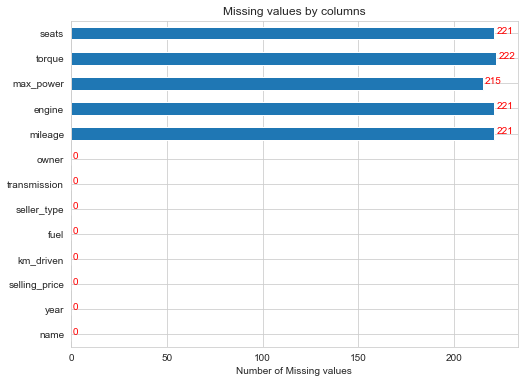

In [334]:
#Displaying the missing values in each column
plt.rcParams["figure.figsize"] = (8,6)
df.isnull().sum().plot.barh()
plt.xlabel('Number of Missing values')
plt.title("Missing values by columns")
for i, v in enumerate(df.isnull().sum()):
    plt.text(v +1, i , str(v), color='red')

Inferences:
> The output displays number of missing values in each column. Seats, torque, max_power, engine & milegae columns consists of 221 missing values

In [335]:
#dropping null values in the dataframe
df1 = df.dropna()

In [336]:
#Displaying the number of null values in each column after removing null values
df1.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

Inferences:
> Here, we can see that the missing values are cleaned 

In [337]:
#Number of unique values in each column
df1.nunique()

name             1982
year               27
selling_price     670
km_driven         898
fuel                4
seller_type         3
transmission        2
owner               5
mileage           393
engine            121
max_power         320
torque            441
seats               9
dtype: int64

Inferences:
> The output displays the number of unique values in the dataset.

In [338]:
#cleaning of columns and chaning to appropriate data types
df1['name']=df1['name'].str.split(' ').str[0]
df1['fuel']=df1['fuel'].astype('category')
df1['seller_type']=df1['seller_type'].astype('category')
df1['transmission']=df1['transmission'].astype('category')
df1['owner']=df1['owner'].astype('category')
df1['name']=df1['name'].astype('category')
df1['seats']=df1['seats'].astype('int')
df1['mileage']=df1['mileage'].str.replace('kmpl', '')
df1['mileage']=df1['mileage'].str.replace('km/kg', '')
df1['mileage']=df1['mileage'].astype('float')
df1['engine']=df1['engine'].str.replace('CC', '')
df1['engine']=df1['engine'].str.replace('CC', '')

Inferences:
> The data is profiled, columns are cleansed, and the columns are codes to appropriate data types so that we can use it for our further analysis

##### Analyzing data distribution in numerical columns 

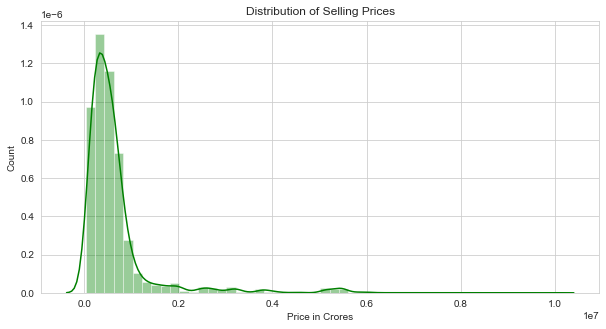

In [339]:
#Distribution of selling prices
plt.figure(figsize=(10,5))
(sns.distplot(df1['selling_price'],bins=50,kde=True,color = "green")).set(xlabel="Price in Crores", ylabel = "Count", title='Distribution of Selling Prices')
plt.show()


Inferences:
> We can see that the selling prices are distributes as displayed in the output. Most of the selling prices falls in between 0 to 1500000
    

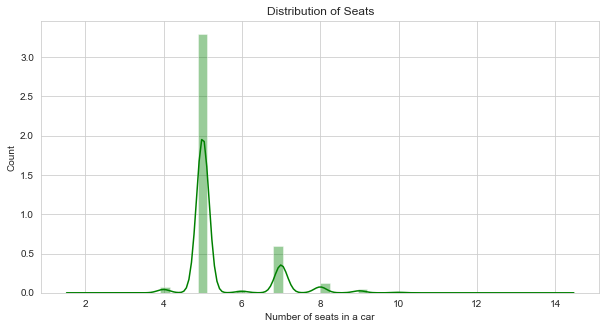

In [340]:
#Distribution of Seats
plt.figure(figsize=(10,5))
(sns.distplot(df1['seats'],bins=50,kde=True,color = "green")).set(xlabel="Number of seats in a car", ylabel = "Count", title='Distribution of Seats')
plt.show()


Inferences:
> We can see that the most number of seats falls in between 4 and 6.

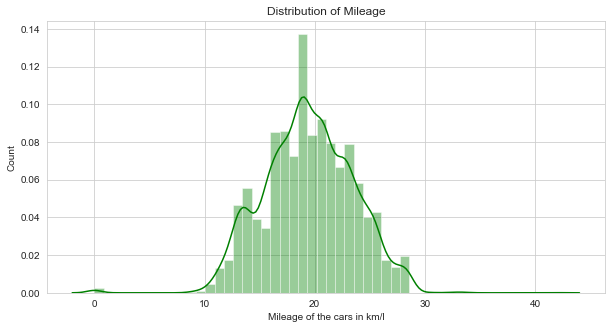

In [341]:
#Distribution of Mileage conditions of cars
plt.figure(figsize=(10,5))
(sns.distplot(df1['mileage'],bins=50,kde=True,color = "green")).set(xlabel="Mileage of the cars in km/l", ylabel = "Count", title='Distribution of Mileage')
plt.show()

Inferences:
> We can see that the most of the cars mileages falls in between 15 and 25 km/l   

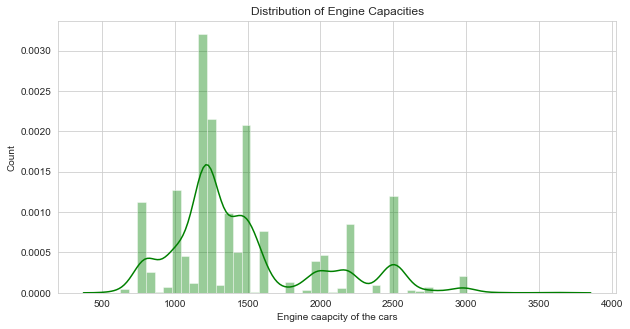

In [342]:
#Distribution of Engine capacity of the cars
plt.figure(figsize=(10,5))
(sns.distplot(df1['engine'],bins=50,kde=True,color = "green")).set(xlabel="Engine caapcity of the cars", ylabel = "Count", title='Distribution of Engine Capacities')
plt.show()

Inferences:
> We can observe that the most of the engine capacities falls in between 1000 and 1500

In [343]:
#5 number summary of Numerical Columns
df1.describe(percentiles=[0.25,0.50,0.75,0.85,0.95])

,year,selling_price,km_driven,mileage,seats
count,7906.000000,7.906000e+03,7.906000e+03,7906.000000,7906.000000
mean,2013.983936,6.498137e+05,6.918866e+04,19.419861,5.416393
std,3.863695,8.135827e+05,5.679230e+04,4.036263,0.959208
min,1994.000000,2.999900e+04,1.000000e+00,0.000000,2.000000
25%,2012.000000,2.700000e+05,3.500000e+04,16.780000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,5.000000
75%,2017.000000,6.900000e+05,9.542500e+04,22.320000,5.000000
85%,2018.000000,8.500000e+05,1.165500e+05,23.840000,7.000000
95%,2019.000000,2.000000e+06,1.500000e+05,25.830000,7.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,14.000000


Inferences:
> The output displays the numercial summary of the numerical columns. The mean, standard deviation, minimum value, maximum value and the percentile renges of the columns are displayed.

#### Numerical and Categorical columns analysis

Text(0.5, 1.0, 'Visualization of the cars that was initially bought')

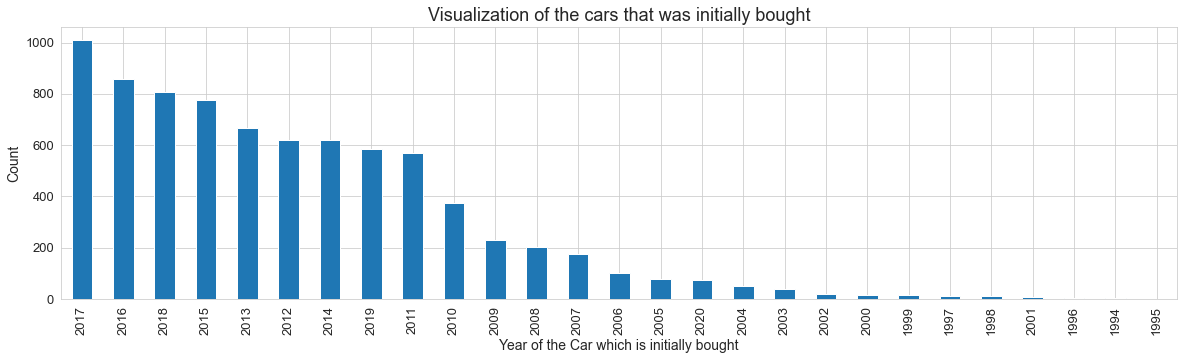

In [344]:
#displaying the count of cars by their initial bought year
df1['year'].value_counts().plot(x="year",figsize=(20, 5),kind='bar',fontsize=13)
plt.xlabel('Year of the Car which is initially bought', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Visualization of the cars that was initially bought',fontsize=18)

Inferences:
> The output displays the value counts of the cars that are being bought initially in a respective year 

Text(0.5, 1.0, 'Visualization of the cars its manufacturing comapny')

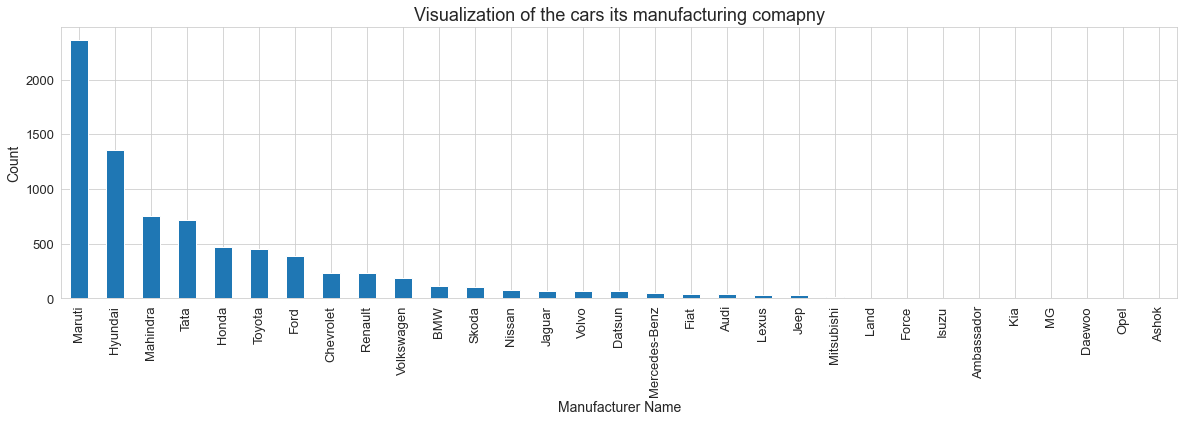

In [345]:
#displaying the count of cars sold by their manufacturing companies
df1['name'].value_counts().plot(x="year",figsize=(20, 5),kind='bar',fontsize=13)
plt.xlabel('Manufacturer Name', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Visualization of the cars its manufacturing comapny',fontsize=18)

Inferences:
> The output displays the value counts of the cars that belongs to respective car manufacturers.

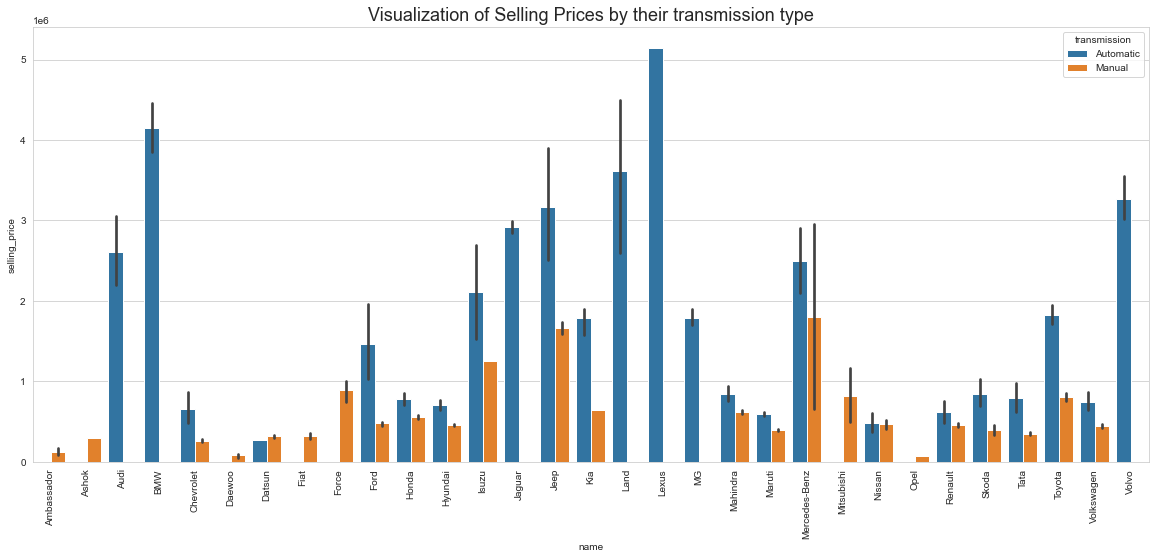

In [346]:
#displaying the comparision of selling prices by their makers and transmission type 
plt.figure(figsize=(20,8))
sns.barplot('name','selling_price',hue='transmission',data=df1)
plt.title('Visualization of Selling Prices by their transmission type', fontsize = 18)
plt.xticks(rotation =90)
plt.show()

Inferences:
> The output displays the comparison of the transmission types by the selling prices and their car manufacturers. Lexus has the most automatic vehicle segmnet and Fiat, Ambassador has only the maual transmision types of the cars that are sold.

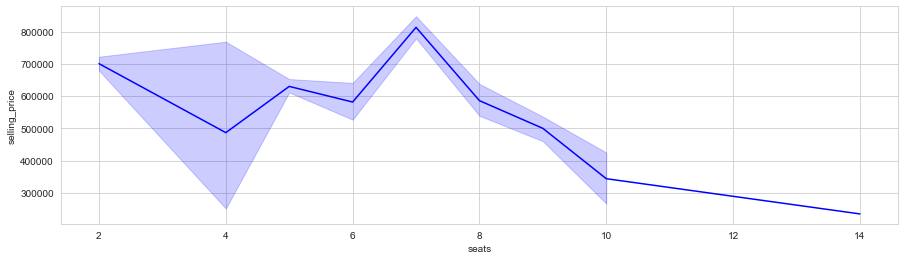

In [347]:
#visualization of selling price by seats capacity
plt.figure(figsize=(15,4))
sns.lineplot(x='seats',y='selling_price', data =df1, color = 'b')
plt.show()

Inferences:
> The output displays the treds of selling prices with respect to seating capacity of the cars. The cars with the highest number of seats has the lower selling price.

In [348]:
#correlation matrix of numerical columns
df1[['year','selling_price','km_driven','seats','mileage']].corr()

,year,selling_price,km_driven,seats,mileage
year,1.000000,0.412302,-0.428548,-0.007923,0.328544
selling_price,0.412302,1.000000,-0.222158,0.041617,-0.126280
km_driven,-0.428548,-0.222158,1.000000,0.227259,-0.172980
seats,-0.007923,0.041617,0.227259,1.000000,-0.451700
mileage,0.328544,-0.126280,-0.172980,-0.451700,1.000000


Inferences:
> The output displays the coorelation matrix of numerical columns. The columns of selling prices and year are highly correlated.

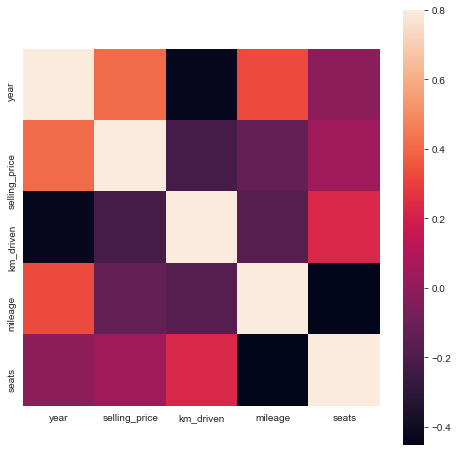

In [298]:
#visualization of correlation matrix
corrmat = df1.corr()
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corrmat, vmax=.8, square=True);

Inferences:
> The output displays te visualization of correlation matrix. The lighter the color, the highest the correlation bwterrn two columns.

<AxesSubplot:xlabel='owner', ylabel='selling_price'>

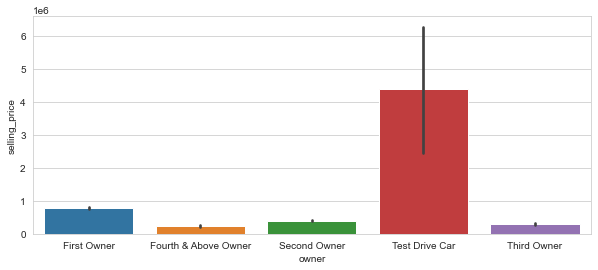

In [349]:
#comparing the selling prices by their owner type
plt.figure(figsize=(10,4))
sns.barplot(df1['owner'],df1['selling_price'])

Inferences:
> The ouput displays the selling price variation of the owner type. The test drive cars has the highest selling prices.

Text(0.5, 1.0, 'Selling Prices by fuel type')

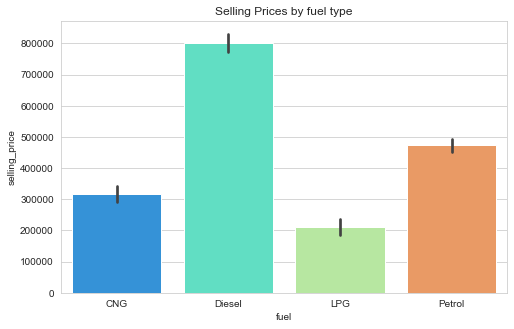

In [350]:
#comaprision of selling_prices by the vehicle fuel type
plt.figure(figsize=(8,5))
sns.barplot(x='fuel',y='selling_price',data=df1, palette='rainbow')
plt.title("Selling Prices by fuel type")

Inferences:
> The visualization of comparision of cars by fuel type and its selling prices. The diesel variant cars has the most selling prices

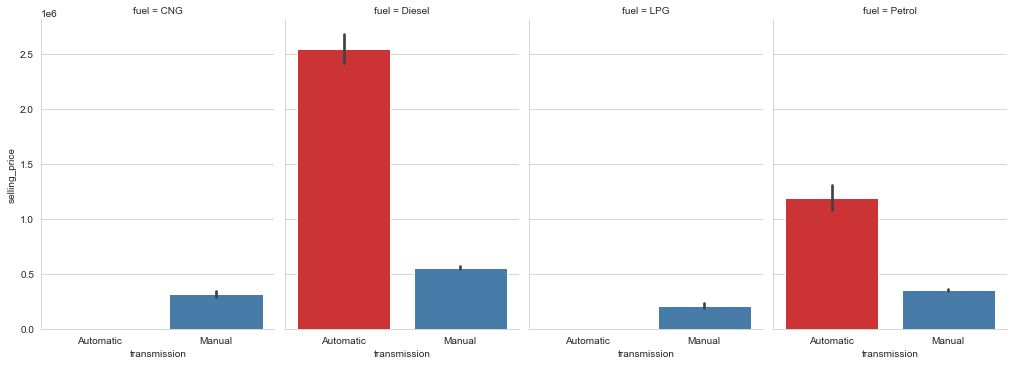

In [352]:
#Displaying the selling prices by their fuel type and transmission type  
sns.catplot(x='transmission',y='selling_price', col = 'fuel', data=df1,
                kind='bar', aspect=.7, palette='Set1')


Inferences:
> Comparision of the selling prices by their selling prices and fuel type. The automatic variant of diesel fuel type has the most selling prices

Text(0, 0.5, 'Selling Prices')

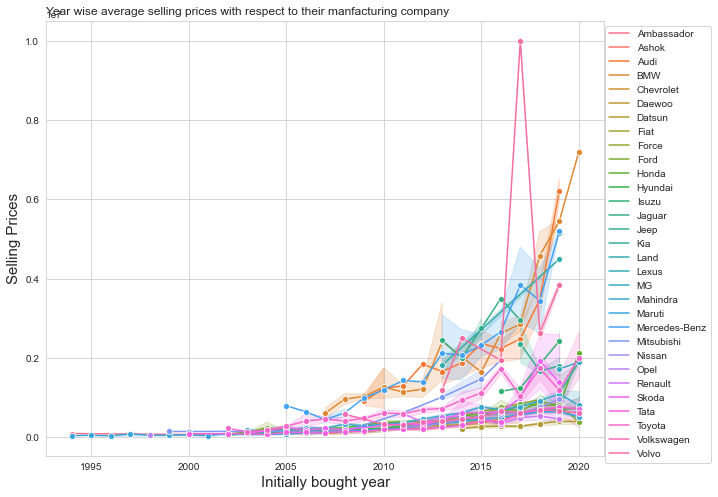

In [353]:
#Displaying the selling price trends of various car maker companies over the years
plt.figure(figsize=(10,8))
plot = sns.lineplot(x='year', y='selling_price', hue="name",marker='o', data=df1)
plot.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title("Year wise average selling prices with respect to their manfacturing company", loc='left')
plt.xlabel("Initially bought year", size=15)
plt.ylabel("Selling Prices", size=15)

Inferences:
> The price trends of the cars over the years by their maker company. The Volvo car of 2017 model has the highest price an dthe prices of all the other cars has rised significantly over the years.

#### Observations:

1) Most of the car prices are in the range of 300000 to 1500000 

2) Most of the cars sold are 5-seaters

3) Most of the cars sold has mileage in range of 18-22 km/liter 

4) Most of the cars sold has the the engine capacity of 1200 to 1300 cc

5) The cars that are bought during 2017 & 2016 are sold mostly

6) The cars that are manufactured by Maruti, Hyundai & Mahindra are sold the most

7) Lexus, BMW, Volvo has the most automatic cars sold rather than manual cars. Force & Fiat has the most manual cars sold than the automatic  ones.

8) The columns year & mileage, and year & kilometers driven has the highest correlation.

9) Test drive cars and first owners cars the highest sold cars

10) Diesel and petrol variant cars the most sold cars.

11) The volvo car manufactured in 2017 has the highest selling price and the prices of the cars has increased significatly over the years.

References: 

1) https://towardsdatascience.com/a-complete-guide-to-plotting-categorical-variables-with-seaborn-bfe54db66bec